# Lab 3 - Visualization

- Name: Nguyễn Hồng Hạnh
- Student ID: 21127503

***

## Work and submission guidelines

**Work on your assignment**

- You need to do your assignment directly in this notebook. First, fill out your name and ID at the beginning of the file. In the notebook, fill in places that say:
```python
#TODO
```

- During your work, you can print out the result, create more cells to test, or create more functions to handle things. Please note that <font color=red>you are not allowed to delete or modify my code cells</font> (except in the case that mentioned above). Remember to remove `raise NotImplementedError("not implement")` when running the code.

- Always press `Ctrl + S` in order to save your work.

**Notes:**

    *  Copy means zero
    *  You have to submit your work on time. No exception
    *  Any questions about your grade are based on the assignment submitted on Moodle
    *  Wrong submission takes you -2 points

**Submit your work**

- When grading your assignment, I will choose `Kernel` - `Restart Kernel & Run All Cells` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename you notebook with your student ID (e.g. `1234567.ipynb`) and submit on Moodle.

- <font color=red>Please strictly follow the submission rules.</font>

## Abstract and general requirements

**Abstract**

- In this assignment, you are required to visualize data and results. This task is very important since it provides reader (your clients, your boss,...) an overview of the data as well as your results.

- You will visualize the data in order to answer some questions. By answering these questions, you are able to get some insights from data.

- You will also visualize the results of machine learning model to be able to know whether your model works well or not.

**General requirements**

- Every charts **must have their own name, axes name, legends**.
- The charts you draw must not only be correct but also beautiful:
    - The correctness is shown in choosing the right chart and accurately calculating the data to draw the chart.
    - The beauty is expressed in the UI/UX of the chart. The beauty of UI is shown in choosing the colors, layout of the chart. The beauty of UX is reflected in the fact that the reader can easily capture your message conveyed through your notebook.

---

In [1]:
# visialize stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import math
import json
# !pip install geopandas
import geopandas

# modeling stuff
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import random

## Data visualization

- In this section, you are going to compute and visualize some information about Covid-19
- The data prepared in `./data` was collected from Worldometer
- Link: https://www.worldometers.info/coronavirus/

In [2]:
# read the data into a dataframe
df = pd.read_csv('./data/data.csv')
print(f'Shape: {df.shape}')
df.head(5)

Shape: (219, 10)


,Country Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,"31,990,143",NaN,"576,298",NaN,"24,560,856","6,852,989","9,321","420,822,699","332,516,170"
1,India,"13,689,453","+3,380","171,089",NaN,"12,253,697","1,264,667","8,944","259,207,108","1,390,568,032"
2,Brazil,"13,521,409",NaN,"355,031",NaN,"11,957,068","1,209,310","8,318","28,600,000","213,737,070"
3,France,"5,067,216",NaN,"99,135",NaN,"310,934","4,657,147","5,916","70,140,847","65,386,285"
4,Russia,"4,657,883","+8,173","103,601",338.0,"4,281,776","272,506","2,300","124,100,000","145,983,351"


### Requrement #1: Preprocess

- **TODO**: Take a look at the data files, then go to the URL aforementioned, explore the meaning of columns in the dataset and fill in the blanks:
    - Country Name: Indicates the name of the country for which the data is reported
    - Total Cases: Represents the total cumulative count of confirmed COVID-19 cases in the given country
    - New Cases: Represents the current number of people detected and confirmed to be infected with the virus
    - Total Deaths: Indicates the total number of confirmed COVID-19-related deaths in the given country
    - New Deaths: Represents the number of newly reported COVID-19-related deaths in the given country on a particular day
    - Total Recovered: Represents the cumulative number of individuals in the given country who have recovered from COVID-19
    - Active Cases: Represents the current number of individuals in the given country who are infected with COVID-19 and have not yet recovered or died
    - Critical Cases: Indicates the number of individuals in the given country who are in critical condition due to COVID-19
    - Total Tests: Represents the cumulative number of COVID-19 tests conducted in the given country
    - Population: Indicates the total population of the given country

- Check the data with `info()` function

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    object 
 2   New Cases        46 non-null     object 
 3   Total Deaths     219 non-null    object 
 4   New Deaths       32 non-null     float64
 5   Total Recovered  217 non-null    object 
 6   Active Cases     217 non-null    object 
 7   Critical Cases   146 non-null    object 
 8   Total Tests      210 non-null    object 
 9   Population       219 non-null    object 
dtypes: float64(1), object(9)
memory usage: 17.2+ KB


- You can see that `New Cases`, `New Deaths`, `Critical Cases` have a lot of missing data (at least 33.3%). Therefore, we have to remove these columns.
- Most of data in columns are `object` type, which are not suitable at all. They should be converted to integer.
- `Total Recovered`, `Active Cases` and `Total Tests` only have a few missing values, so we can fill in these missing values with median value of each column.

In [4]:
# TODO: drop New Cases, New Deaths, Critical Cases
df = df.drop(columns=['New Cases', 'New Deaths', "Critical Cases"])

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country Name     219 non-null    object
 1   Total Cases      219 non-null    object
 2   Total Deaths     219 non-null    object
 3   Total Recovered  217 non-null    object
 4   Active Cases     217 non-null    object
 5   Total Tests      210 non-null    object
 6   Population       219 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


In [5]:
# TODO: convert data to integer. if the converter returns error, leave it a None
cols = df.columns.tolist()
cols.pop(0)
for col in cols:
  convert = []
  for id, value in enumerate(df[col]):
    if (isinstance(value, (int, float)) and math.isnan(value)):
      convert.append(None)
    else:
      try:
        convert.append(int(value.replace(',', '')))
      except ValueError:
        convert.append(None)
  df[col] = convert

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     204 non-null    float64
 3   Total Recovered  217 non-null    float64
 4   Active Cases     217 non-null    float64
 5   Total Tests      210 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: We did handle missing value before. Why do we still have missing values here?

As in Python, an empty string (' ') is not the same as None. An empty string is a valid string with a length of zero, whereas None is a special constant in Python representing the absence of a value or a null value. Therefore, when converting from string to int, it may result in additional
null values."

In [6]:
# TODO: fill in the missing data with median value
df.fillna(df.median(), inplace=True)

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     219 non-null    float64
 3   Total Recovered  219 non-null    float64
 4   Active Cases     219 non-null    float64
 5   Total Tests      219 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


<ipython-input-6-ff020533acce>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


**TODO**: Why do we have `float64` here?

Because 'int' cannot represent 'None', so when converting to int, if the column contains at least one 'None' value, the data type of that column may be changed to 'float64' to accommodate the 'None' value.

In [7]:
# TODO: save your new data frame to `./data/new_data.csv`
df.to_csv('./data/new_data.csv', index=False)

In [8]:
# TEST
file = open('./data/new_data.csv', 'r')
new_data = file.read()
file.close()

file = open('./data/correct_data.csv', 'r')
correct_data = file.read()
file.close()

assert new_data == correct_data

### Requirement #2: Visualize single variable

- For now, if you do not pass the test, you have to work on the correct file by un-commenting the cell code below to read the `./data/correct_data.csv` into `df`
- You are going to draw 6 bar charts which show all the fields of dataset. For each bar chart, sort the values of countries in descending order and only visualize 5 countries

In [9]:
# un-comment these lines of code
df = pd.read_csv('./data/correct_data.csv')

df.head()

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,31990143,576298.0,24560856.0,6852989.0,420822699.0,332516170
1,India,13689453,171089.0,12253697.0,1264667.0,259207108.0,1390568032
2,Brazil,13521409,355031.0,11957068.0,1209310.0,28600000.0,213737070
3,France,5067216,99135.0,310934.0,4657147.0,70140847.0,65386285
4,Russia,4657883,103601.0,4281776.0,272506.0,124100000.0,145983351


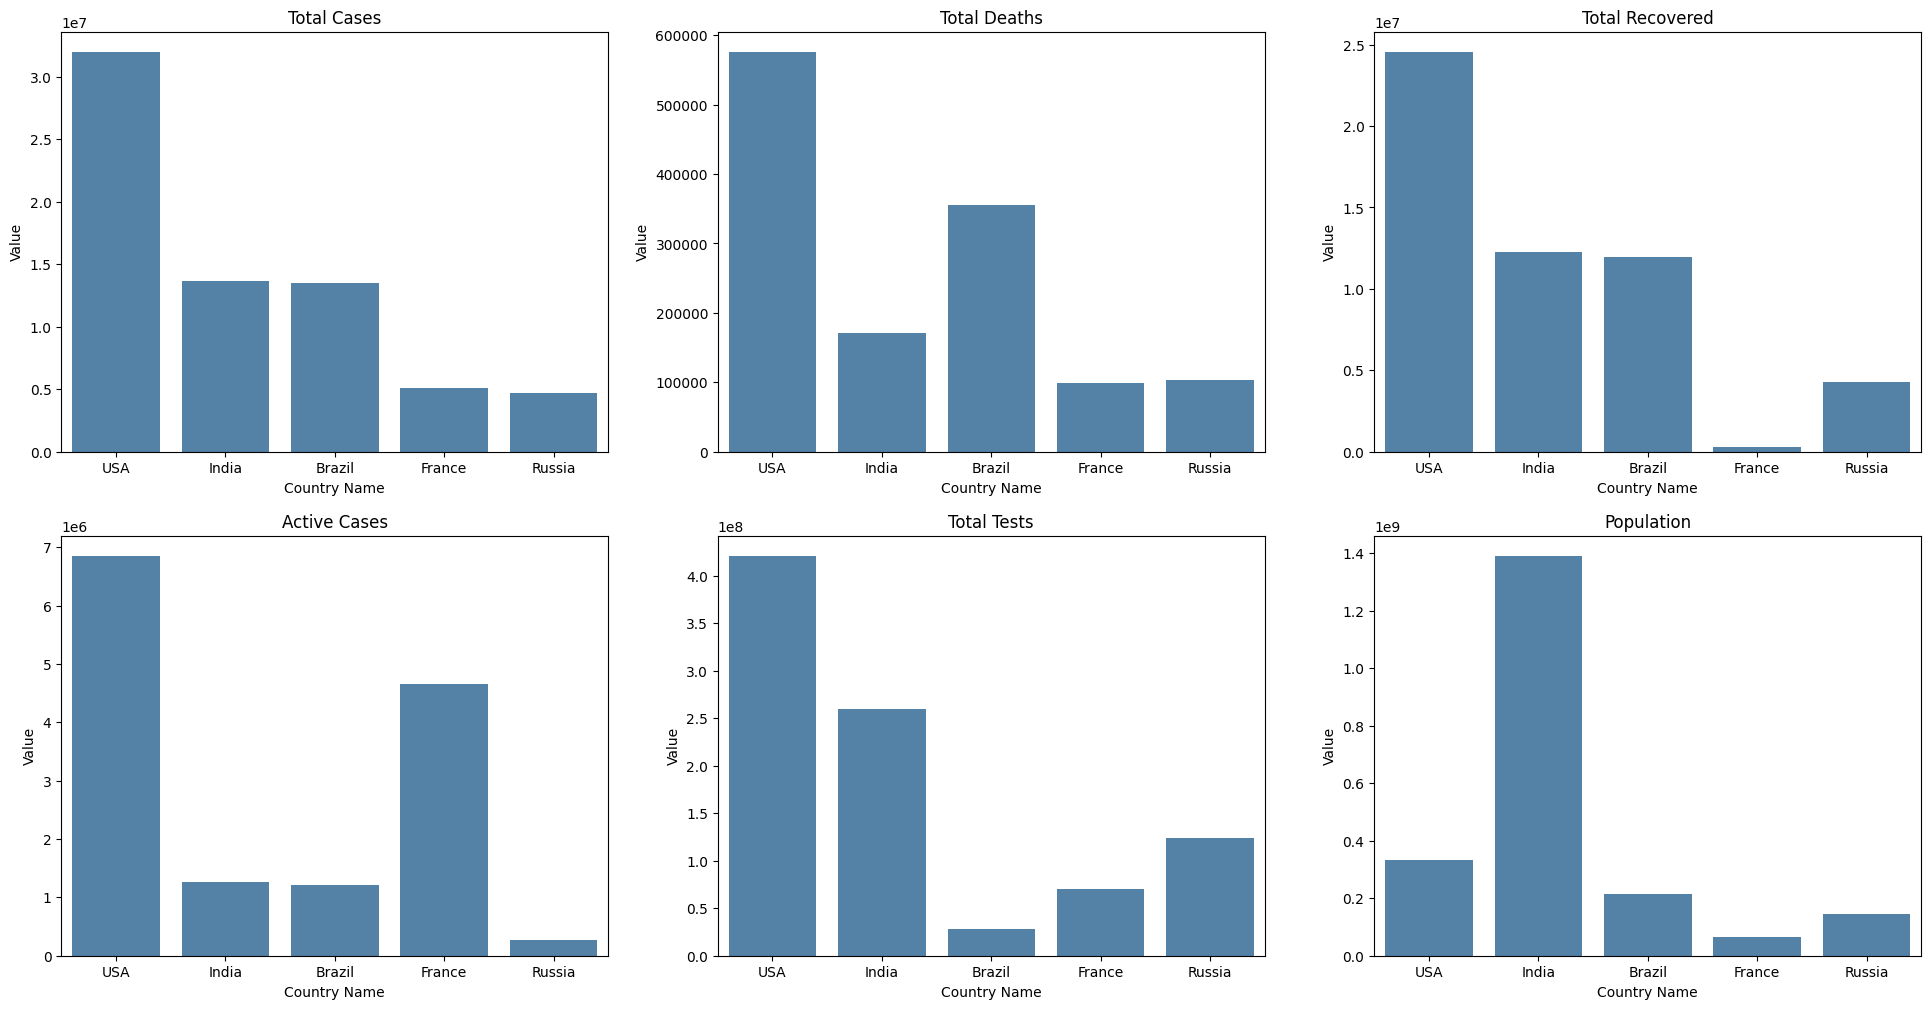

In [10]:
# TODO: draw 6 bar charts

fig, axs = plt.subplots(2, 3, figsize=(24, 12))

columns = df.columns.tolist()

for i, ax in enumerate(axs.flatten()):
  sn.barplot(df.head(), x="Country Name", y=columns[i+1], color='steelblue', ax=ax)
  ax.set_xlabel('Country Name')
  ax.set_ylabel('Value')
  ax.set_title(columns[i+1])

plt.show()

**TODO**: Comment about the chart

The chart illustrates the total cases, total deaths, total recovered, active cases, total tests, and population figures of five countries: the USA, India, Brazil, France, and Russia. Looking at the bar chart, it can be observed that despite India having the highest population, the USA leads in total cases, total deaths, total recovered, active cases, and total tests among the five countries. For France, although the total cases are not as high as in the other countries, the total recovered is significantly low, resulting in a much higher number of active cases compared to the remaining three countries.

### Requirement #3: Draw world map

- Using bar chart just gives you a little bit information about numbers
- In this requirement, you are going to draw a world map with circles which shows the number of cases for each country. Specifically, you are provided a file named `coord.json` that contains longitude and latitude of each country. You are going to use `Total cases` and `Total Death` to draw the following charts

<ipython-input-11-2093419ccfe4>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


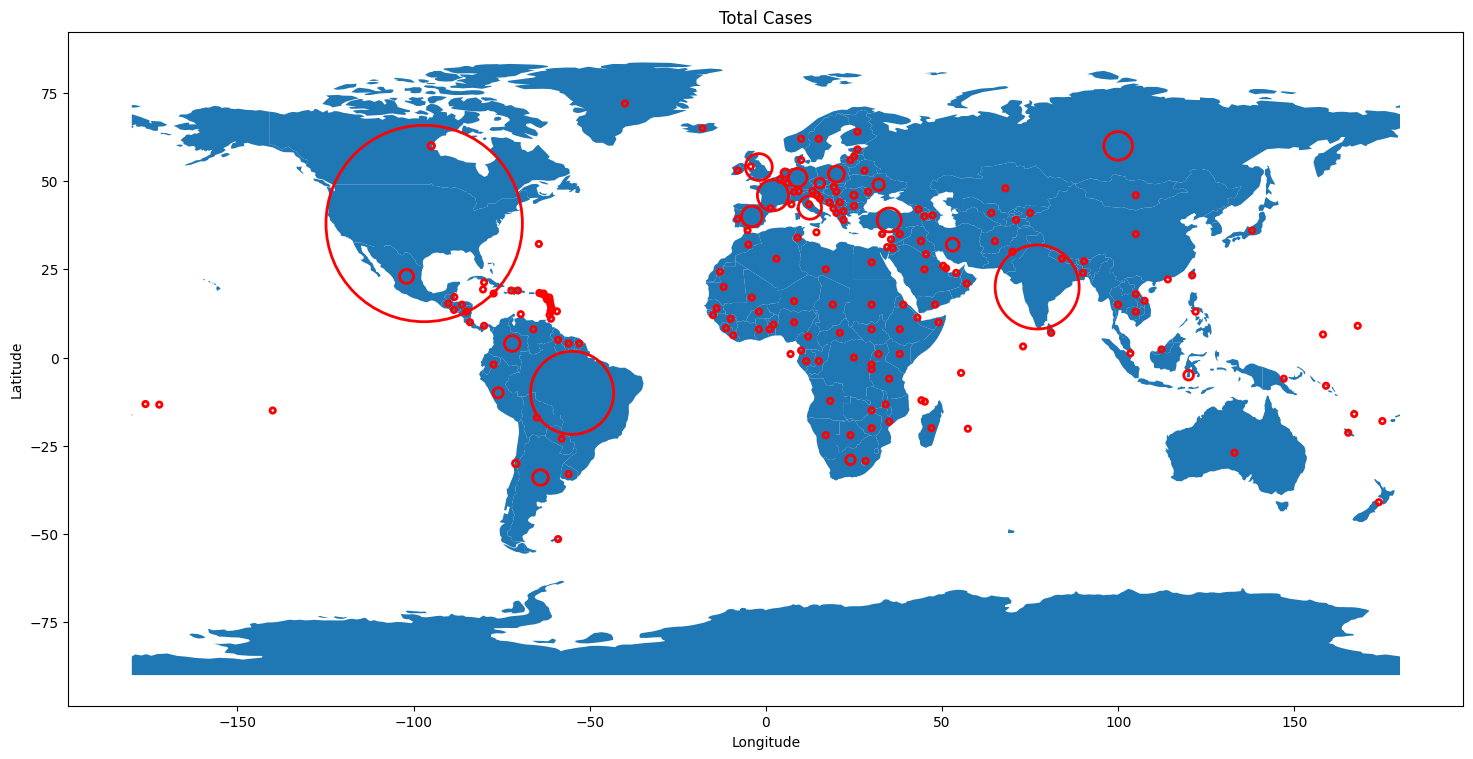

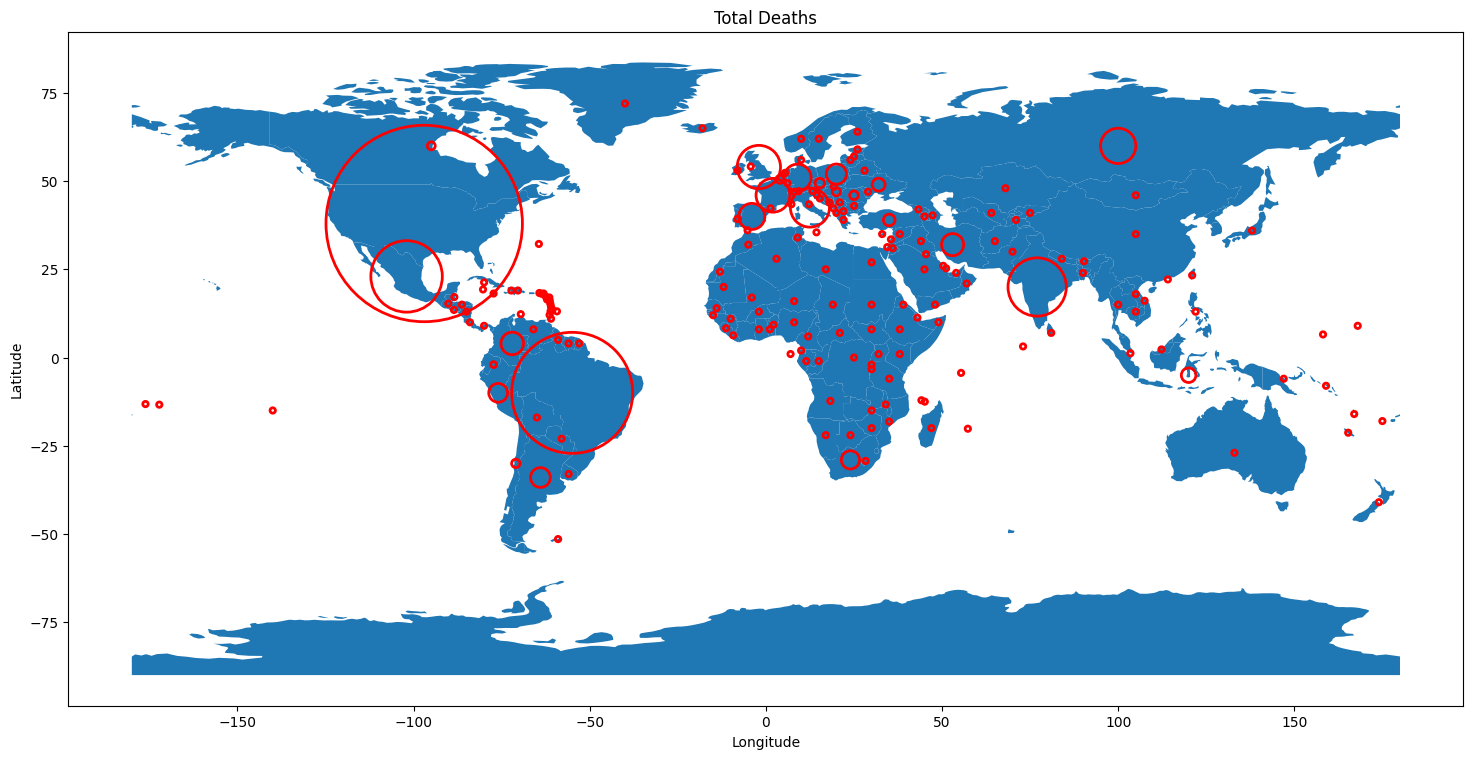

In [11]:
# TODO: draw 2 world map chart using geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

with open('./data/coord.json', 'r') as file:
    coord_data = json.load(file)

columns = ['Total Cases', 'Total Deaths']

for column in columns:
  df_new = df[['Country Name', column]].copy()
  df_new[column] = (df_new[column] - df_new[column].min()) / (df_new[column].max() - df_new[column].min())
  df_new = df_new.merge(pd.DataFrame(coord_data), left_on='Country Name', right_index=True)

  world.plot(figsize=(18,10));

  min_size = 15  # Kích thước tối thiểu mong muốn
  scaled_sizes = [max(value**2*20000, min_size) for value in df_new[column]]

  plt.scatter(df_new['long'], df_new['lat'], s=scaled_sizes, facecolors='none', edgecolors="red", linewidth=2)
  plt.xlabel("Longitude")
  plt.ylabel("Latitude")
  plt.title(column)


**TODO**: Comment about the chart

The total cases and total deaths are significantly higher in North America and South America, with a substantial gap compared to other continents. In Europe, cases and deaths are distributed evenly, with relatively high numbers. In Africa, there is not a significant difference in total cases and total deaths among countries, and the figures are relatively low compared to other continents, but they are widespread. In Asia, cases and deaths are concentrated primarily in regions bordering Africa and Europe, with the highest concentration in India. Additionally, in the Asian territory of Russia, there is also a notable concentration of cases and deaths.

### Requirement #4: Relationship between 2 variables

- Exploring the relationship between variables is a needed task to do
- You will start with exploring the linear relationship between 2 variables. In order to do so, draw $C_6^2=15$ scatter plots. For each plot, draw a line that shows the linear relationship of variables. You should implement the line yourself instead of using library.

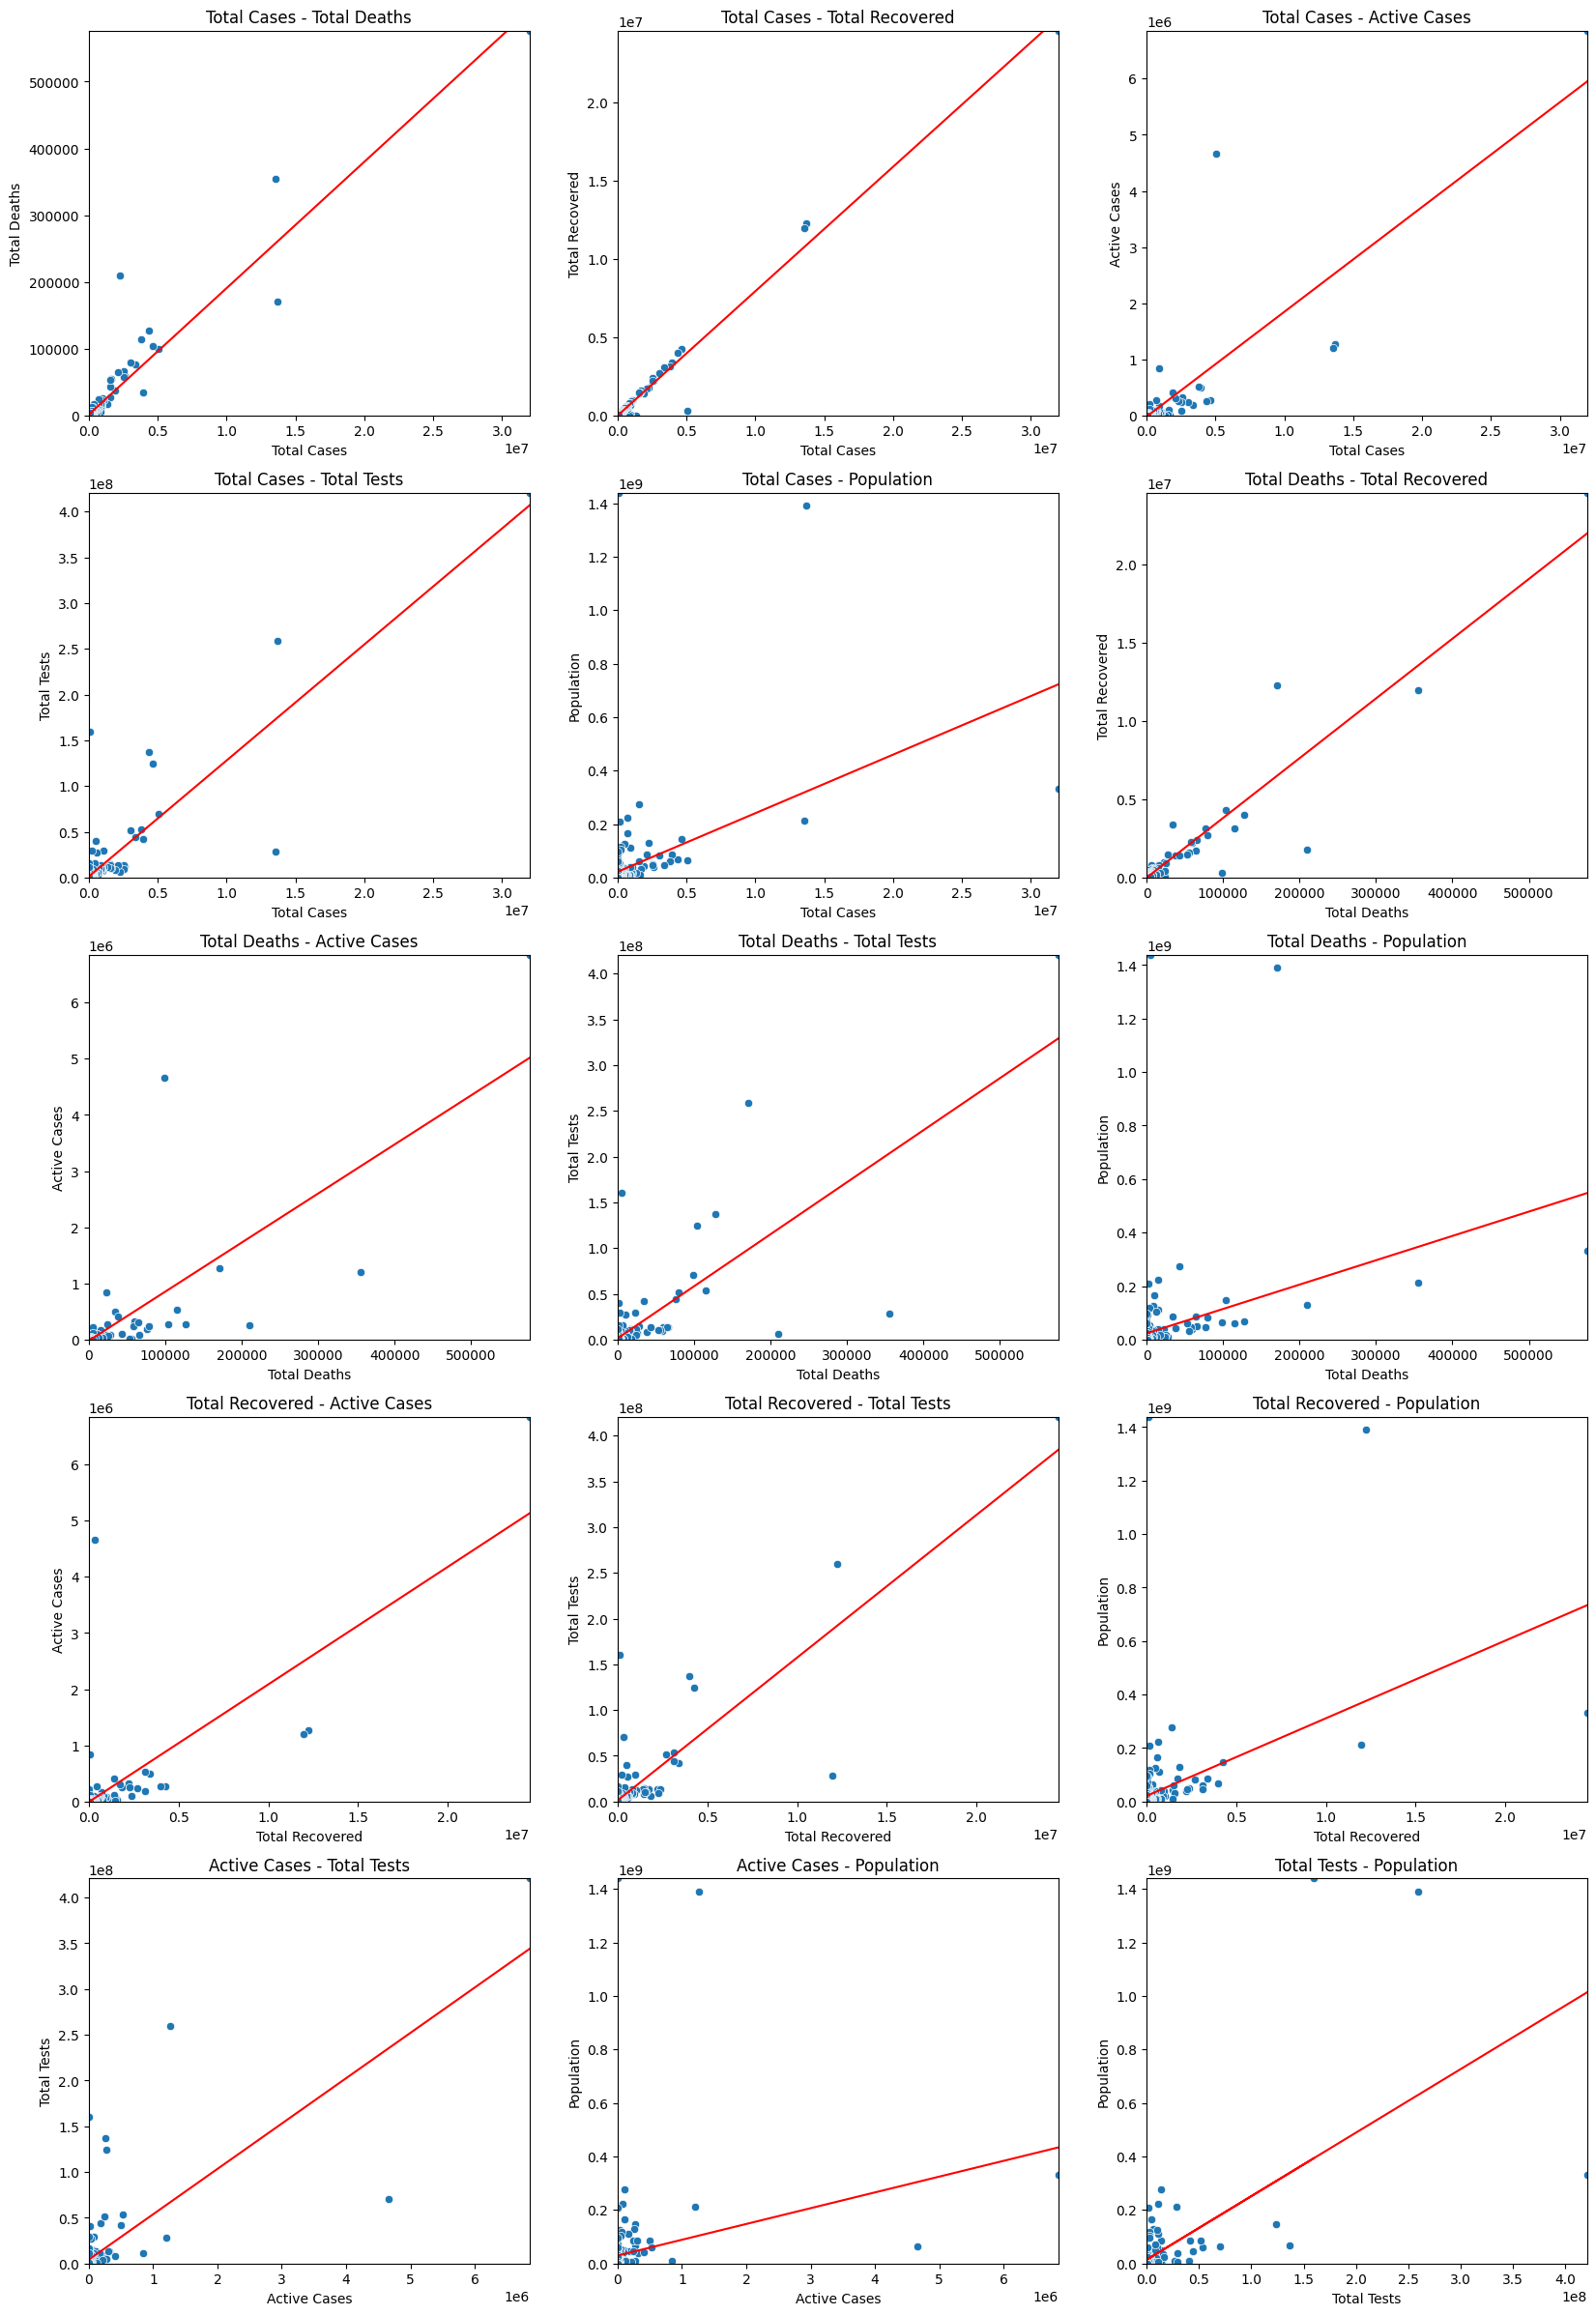

In [12]:
# TODO: scatter stuff

columns = df.columns.tolist()

pairs = []
for i in range(len(columns[1:])):
    for j in range(i + 1, len(columns[1:])):
        pairs.append([columns[i + 1], columns[j+1]])

fig, axs = plt.subplots(len(pairs) // 3, 3, figsize=(20, 30))

for i, ax in enumerate(axs.flatten()):
  pair = pairs[i]
  x = df[pair[0]]
  y = df[pair[1]]
  sn.scatterplot(x=pair[0], y=pair[1], data=df, ax=ax)

  slope = (len(x) * sum(x * y) - sum(x) * sum(y)) / (len(x) * sum(x**2) - (sum(x))**2)
  intercept = (sum(y) - slope * sum(x)) / len(x)

  ax.plot(x, slope * x + intercept, color='red')

  ax.set_xlim(0, max(x) + 1)
  ax.set_ylim(0, max(y) + 1)
  ax.set_title(f'{pair[0]} - {pair[1]}')


plt.show()

**TODO**: As showed above, give your prediction about the relationship between each pair.

Looking at the scatter plots, it can be observed that total cases and total recovered exhibit a very strong correlation. Additionally, there is also a correlation between total cases - total deaths and total deaths - total recovered.

### Requirement #5: Double check the relationship between 2 variables

- In order to make sure about the linear relationship, you have to check each pair with **Pearson correlation coefficient**
- Specifically, $\rho$ is calculated as follows:

$$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

- Then, plot these 15 values using heatmap

<ipython-input-13-970dc14a0c28>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df[1:].corr()


<Axes: >

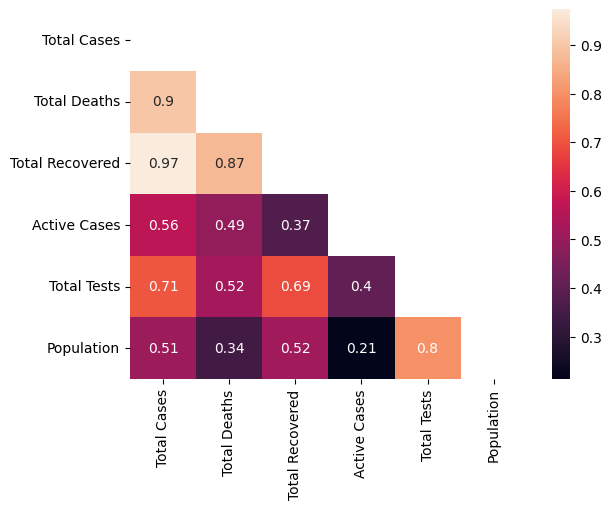

In [13]:
# TODO: create heatamp

corr= df[1:].corr()

matrix = np.triu(corr)

sn.heatmap(corr, annot=True, mask=matrix)

For now, you can check whether your prediction is right or wrong!

## Model visualization

- In this section, we are going to visualize the training and testing process of machine learning model
- The process of training and testing a model is as follow:
    1. Prepare data for training and testing
    2. Create a model
    3. Train and test the model
    4. Visualize the result

- You are required to:
    1. Study Multi-layer neural network and Convolutional neural network
    2. Study `Pytorch` in order to prepare data and design machine learning model
    3. Design 2 models to classify MNIST dataset. Then, visualize the result of each model and compare the result to each other
        - Model 1: A fully-connected model with 4 layers. The input layer has $784$ neurons. The hidden layer #1 has $1024$ neurons, which is followed by a $ReLU$ as activation functions. The hidden layer #2 has $512$ neurons, also followed by a $ReLU$ as activation functions. The output layer has $10$ neurons (of course), which follows by a $LogSoftmax$ function
        - Model 2: A CNN model with 2 Convolution layers and 1 linear layer. All the CNN layers have 20 filters, kernel size equal to $5$. Each of them is followed by a $ReLU$ activation function and a MaxPooling2D layer ($kernel\_size=2$). The linear layer is followed by a $LogSoftmax$ activation function

- Google Colab can be used since it provides free GPU, which makes your training and testing process faster

### Requirement #6: Prepare data

- `Pytorch` supports a lot of datasets for running machine learning model. In this lab, we use MNIST dataset. So, download the training set and the testing set using `Pytorch` and store them in `./data`
- Note that you have to transform your data into `tensor` (a datatype that's quite similar to `numpy array`) so you can input to model
- After that, create `train_dataloader` and `test_dataloader`

**TODO**: Explain why we have to create dataloader

Dataloader is used to package data into small batches, helping to accelerate model training as well as optimize memory usage.

In [14]:
# TODO: download training, testing data and store them into training_data and testing_data
# Then, create train_dataloader and test_dataloader with batch_size=32

transform = ToTensor()

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

data_iter = iter(train_loader)
images, labels = next(data_iter)

# In thông tin về batch
print(f"Batch Size: {images.size(0)}")  # Kích thước của batch
print(f"Number of Channels: {images.size(1)}")  # Số channels
print(f"Image Size: {images.size(2)} x {images.size(3)}")  # Kích thước của ảnh

Batch Size: 32
Number of Channels: 1
Image Size: 28 x 28


- After downloading the data, visualize 10 random samples (2 rows, 5 samples for each row) from training set.

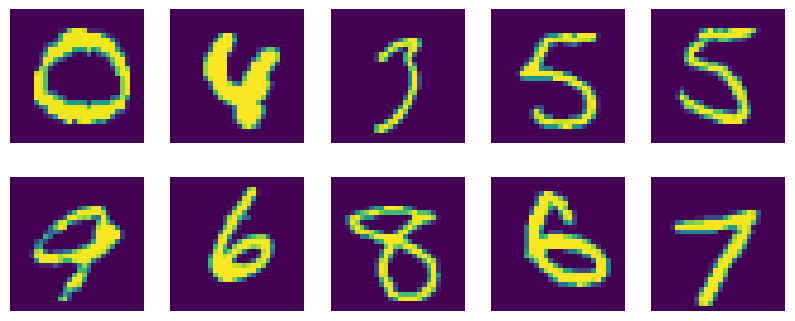

In [15]:
# TODO: visualize 10 random samples

def show_images(images, num_rows=2, num_cols=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4))
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i, j].imshow(images[i * num_cols + j])
            axes[i, j].axis('off')
    plt.show()

# Get a batch of random training data
images, _ = next(iter(train_loader))

# Convert torch tensor to numpy array for visualization
images = images.numpy()

# Reshape images to (batch_size, height, width)
images = images.reshape(32, 28, 28)

# Show the images in a 2x5 grid
show_images(images)

### Requirement #7: Create models

- Create 2 models as mentioned above. Call them `Mnist_FC` and `Mnist_CNN`
- **I strongly recommend that you should slowly implement, print out the output and its shape of each layer in order to get a deep understanding of what you are trying to do**
- Before moving to the next requirement, you should test your model with a random sample of the dataset. In case you create code cells for testing, remember to remove these cells

In [16]:
# TODO: create Mnist_FC and Mnist_CNN

class Mnist_FC(nn.Module):
  def __init__(self):
    super(Mnist_FC, self).__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(784, 1024)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(1024, 512)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(512, 10)
    self.logsoftmax = nn.LogSoftmax(dim=1)

  def forward(self, x):
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.fc2(x)
    x = self.relu2(x)
    x = self.fc3(x)
    x = self.logsoftmax(x)
    return x

class Mnist_CNN(nn.Module):
  def __init__(self):
    super(Mnist_CNN, self).__init__()

    # First Convolutional Layer
    self.conv1 = nn.Conv2d(1, 20, kernel_size=5)
    self.relu1 = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size=2)

    # Second Convolutional Layer
    self.conv2 = nn.Conv2d(20, 20, kernel_size=5)
    self.relu2 = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size=2)

    self.flatten = nn.Flatten()
    self.fc = nn.Linear(20 * 4 * 4, 10)
    self.logsoftmax = nn.LogSoftmax(dim=1)

  def forward(self, x):
    # First Convolutional Layer
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.pool1(x)

    # Second Convolutional Layer
    x = self.conv2(x)
    x = self.relu2(x)
    x = self.pool2(x)

    # Flatten before fully connected layer
    x = self.flatten(x)

    # Fully connected layer
    x = self.fc(x)

    # LogSoftmax activation
    x = self.logsoftmax(x)

    return x

### Requirement #8: Train and test models

- Design `train` and `test` function with the parameters provided in the following code cell
    - `train` function trains the model with all the data in training set
    - `test` function tests the model with all data in testing set

- Return the accuracy (e.g. $0.847351$) after training and testing

**TODO**: Explain the parameters of `train` and `test` function. In `test` function, there is a line of code that says `with torch.no_grad()`. Why do we have this line of code?

*   dataloader: provides data from the dataset to the model during training, data Type: DataLoader
*   model: training model, data Type: torch.nn.Module
*   loss_fn: the loss function used to measure the discrepancy between the model's predictions and the actual labels, data Type: torch.nn.modules.loss._Loss
*   optimizer: an optimizer object in PyTorch used for updating the model's weights based on the gradient of the loss function, data Type: torch.optim.Optimizer

The line of code with torch.no_grad() is used to disable gradient computation during the evaluation or testing phase to avoid unnecessary calculations

In [17]:
# TODO: design train and test function

# check gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device} for training and testing')

def train(dataloader, model, loss_fn, optimizer):
  model.train()
  correct_predictions = 0
  total_samples = 0
  total_loss = 0

  for inputs, labels in dataloader:
    optimizer.zero_grad()

    outputs = model(inputs)

    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()

    _, predicted = torch.max(outputs, 1)
    correct_predictions += (predicted == labels).sum().item()
    total_samples += labels.size(0)

  average_loss = total_loss / len(dataloader)
  accuracy = correct_predictions / total_samples

  return average_loss, accuracy

def test(dataloader, model):
  model.eval()
  correct_predictions = 0
  total_samples = 0

  with torch.no_grad():
    for inputs, labels in dataloader:
      outputs = model(inputs)

      _, predicted = torch.max(outputs, 1)
      correct_predictions += (predicted == labels).sum().item()
      total_samples += labels.size(0)

  accuracy = correct_predictions / total_samples

  return accuracy

Using cpu for training and testing


- Run 20 epochs for each model. In order to do so, at fist, you have to define `learning_rate, loss_fn` and `optimizer`. I will help you on that

- Save the history of training and testing process as `history_fc` and `history_cnn`. During the running process, you should print out the accuracy in order to keep track

- The history is a dictionary with the following structure:

```python
history = {
    1: [0.6, 0.5], # the key (type: int) is the epoch
    2: [0.7, 0.6], # the value (type: list) contains the accuracy of training and testing process at the corresponding epoch
    ...
}
```

**TODO**: List out some loss functions and optimizers that you have heard about

Loss functions:

*   Mean Squared Error (MSE) Loss: Measures the average squared difference between predicted and target values
*   Mean Absolute Error (MAE) Loss: Measures the average absolute difference between predicted and target values
*   Cross-Entropy Loss: Commonly used in multiclass classification tasks to measure the uncertainty between the predicted probability distribution and the actual probability distribution of classes

Optimizers:

*   Stochastic Gradient Descent (SGD): Update parameters based on the gradient of the loss function
*   Root Mean Square Propagation (RMSprop): Adaptive learning rate method that maintains a moving average of squared gradients



In [18]:
# define model

loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
def optimizer(model):
  return torch.optim.SGD(model.parameters(), lr=learning_rate)

# TODO: run 20 epochs for Mnist_FC and Mnist_CNN
model_FC = Mnist_FC()
model_CNN = Mnist_CNN()

num_epochs = 20
history_FC = {}
history_CNN = {}

# FC Model
print('========== FC model ========== \n')

for epoch in range(num_epochs):
  train_loss, train_accuracy = train(train_loader, model_FC, loss_fn, optimizer(model_FC))
  test_accuracy = test(test_loader, model_FC)

  history_FC[epoch + 1] = [train_accuracy, test_accuracy]

  print('Epoch ', epoch + 1)
  print('-------------------------------')
  print('Training acc: ', train_accuracy)
  print('Test acc: ', test_accuracy)
  print('\n')

# CNN Model
print('========== CNN model ========== \n')

for epoch in range(num_epochs):
  train_loss, train_accuracy = train(train_loader, model_CNN, loss_fn, optimizer(model_CNN))
  test_accuracy = test(test_loader, model_CNN)

  history_CNN[epoch + 1] = [train_accuracy, test_accuracy]

  print('Epoch ', epoch + 1)
  print('-------------------------------')
  print('Training acc: ', train_accuracy)
  print('Test acc: ', test_accuracy)
  print('\n')

========== FC model ========== 

Epoch  1
-------------------------------
Training acc:  0.37538333333333335
Test acc:  0.6197


Epoch  2
-------------------------------
Training acc:  0.6595333333333333
Test acc:  0.7123


Epoch  3
-------------------------------
Training acc:  0.7352833333333333
Test acc:  0.7789


Epoch  4
-------------------------------
Training acc:  0.8007333333333333
Test acc:  0.8219


Epoch  5
-------------------------------
Training acc:  0.8326666666666667
Test acc:  0.8461


Epoch  6
-------------------------------
Training acc:  0.8525666666666667
Test acc:  0.8645


Epoch  7
-------------------------------
Training acc:  0.86665
Test acc:  0.8763


Epoch  8
-------------------------------
Training acc:  0.8758666666666667
Test acc:  0.8843


Epoch  9
-------------------------------
Training acc:  0.8831166666666667
Test acc:  0.8894


Epoch  10
-------------------------------
Training acc:  0.88905
Test acc:  0.8945


Epoch  11
---------------------------

### Requirement #9: Visualize

- Produce a graph as the following code cell and comment about the running process of 2 models

**TODO**: Your comment

Higher accuracy of the CNN model suggests that the CNN model is performing better than FC model and is more effective at correctly classifying digits in MNIST dataset. However, ưhile CNNs are powerful for image-related tasks, FC models might be more suitable for tasks where spatial relationships are less critical

<ipython-input-19-2b4fd3a18397>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


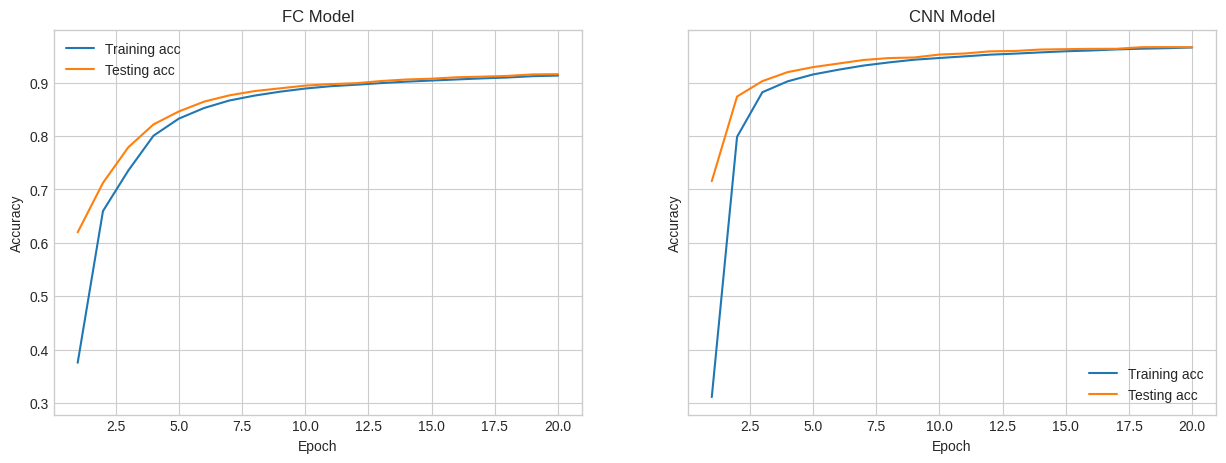

In [19]:
# TODO: visualize the history

fc_epochs = list(history_FC.keys())
fc_train_acc = [item[0] for item in history_FC.values()]
fc_test_acc = [item[1] for item in history_FC.values()]

cnn_epochs = list(history_CNN.keys())
cnn_train_acc = [item[0] for item in history_CNN.values()]
cnn_test_acc = [item[1] for item in history_CNN.values()]

plt.style.use('seaborn-whitegrid')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

ax1.plot(fc_epochs, fc_train_acc, label="Training acc")
ax1.plot(fc_epochs, fc_test_acc, label="Testing acc")
ax1.set(title="FC Model", xlabel="Epoch", ylabel="Accuracy")
ax1.legend()

ax2.plot(cnn_epochs, cnn_train_acc, label="Training acc")
ax2.plot(cnn_epochs, cnn_test_acc, label="Testing acc")
ax2.set(title="CNN Model", xlabel="Epoch", ylabel="Accuracy")
ax2.legend()

- Highly recommend you go play around with the parameters of models and re-implement 2 models using `TensorFlow` on Colab